2005-03-09T00:00:00, Close, 1.33930
2005-03-10T00:00:00, Close, 1.34190
2005-03-11T00:00:00, Close, 1.34580
2005-03-14T00:00:00, Close, 1.33700
2005-03-15T00:00:00, Close, 1.33050
2005-03-16T00:00:00, Close, 1.34170
2005-03-17T00:00:00, Close, 1.33780
2005-03-18T00:00:00, Close, 1.33245
2005-03-21T00:00:00, Close, 1.31575
2005-03-22T00:00:00, Close, 1.30870
2005-03-23T00:00:00, Close, 1.29855
2005-03-24T00:00:00, Close, 1.29390
2005-03-25T00:00:00, Close, 1.29575
2005-03-28T00:00:00, Close, 1.28980
2005-03-29T00:00:00, Close, 1.29220
2005-03-30T00:00:00, Close, 1.29150
2005-03-31T00:00:00, Close, 1.29635
2005-04-01T00:00:00, Close, 1.29135
2005-04-04T00:00:00, Close, 1.28475
2005-04-05T00:00:00, Close, 1.28685
2005-04-06T00:00:00, Close, 1.28710
2005-04-07T00:00:00, Close, 1.28565
2005-04-08T00:00:00, Close, 1.29570
2005-04-11T00:00:00, Close, 1.29725
2005-04-12T00:00:00, Close, 1.29225
2005-04-13T00:00:00, Close, 1.29140
2005-04-14T00:00:00, Close, 1.28120
2005-04-15T00:00:00, Close, 

C:\Users\Anthony Jungo\AppData\Local\Temp\ipykernel_15392\1615898070.py:41: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


BUY 500 close 1.145055
BUY 500 close 1.10863
BUY 500 close 1.06905
BUY 500 close 1.019935
BUY 500 close 1.012265
BUY 500 close 0.98592
BUY 500 close 1.073325
BUY 500 close 1.073285
BUY 500 close 1.07934
BUY 500 close 1.05945
BUY 500 close 1.092355


C:\Users\Anthony Jungo\AppData\Local\Temp\ipykernel_15392\1615898070.py:119: FutureWarning: 'y' is deprecated and will be removed in a future version, please use 'Y' instead.
  perf_stats_year = (pnl).groupby(pnl.index.to_period('y')).apply(lambda data: pf.timeseries.perf_stats(data)).unstack()
c:\Users\Anthony Jungo\AppData\Local\Programs\Python\Python311\Lib\site-packages\empyrical\stats.py:710: RuntimeWarning: invalid value encountered in divide
  np.divide(
c:\Users\Anthony Jungo\AppData\Local\Programs\Python\Python311\Lib\site-packages\empyrical\stats.py:799: RuntimeWarning: invalid value encountered in divide
  np.divide(average_annual_return, annualized_downside_risk, out=out)
c:\Users\Anthony Jungo\AppData\Local\Programs\Python\Python311\Lib\site-packages\empyrical\stats.py:1527: RuntimeWarning: invalid value encountered in scalar divide
  return np.abs(np.percentile(returns, 95)) / \
c:\Users\Anthony Jungo\AppData\Local\Programs\Python\Python311\Lib\site-packages\empyrical\sta

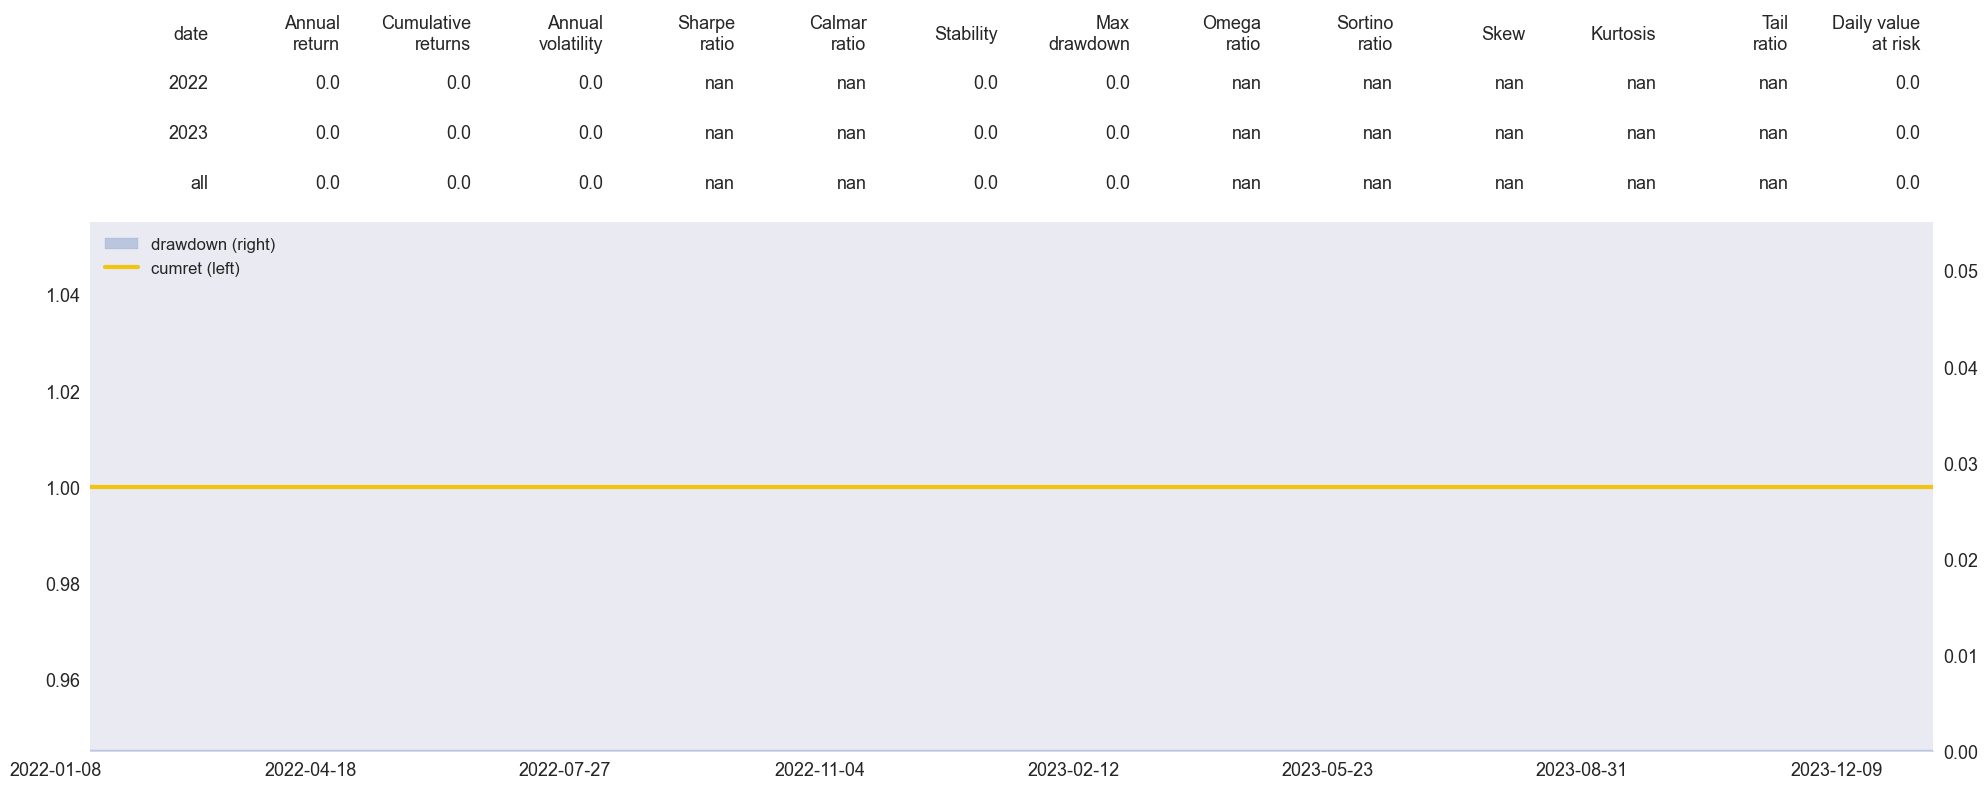

In [14]:
import pandas as pd
import numpy as np
import pyfolio as pf
import backtrader as bt
import datetime
from copy import deepcopy
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker 
%matplotlib inline

data = pd.read_csv("historical_forex_data20.csv")
data = data.set_index(pd.to_datetime(data['date'], dayfirst=True, format='%Y-%m-%d'))

data = data.drop('date',axis = 1)
data
class TestStrategy(bt.Strategy):
    def log(self, txt, dt=None):
        ''' Logging function for this strategy'''
        dt = dt or self.datas[0].datetime.datetime(0)
        print('%s, %s' % (dt.isoformat(), txt))

    def __init__(self):
        # Keep a reference to the "close" line in the data[0] dataseries
        self.dataclose = self.datas[0].close
        

    def next(self):
        # Simply log the closing price of the series from the reference
        self.log('Close, %.5f' % self.dataclose[0])

cerebro3 = bt.Cerebro(stdstats=False)
cerebro3.broker.set_cash(100)
datafeed1 = bt.feeds.PandasData(dataname=data)
cerebro3.adddata(datafeed1, name='EURUSD')
cerebro3.addstrategy(TestStrategy)
result = cerebro3.run()

#Customize Backtest Chart()
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = 15, 10

class my_Trades(bt.observers.Trades):
    # Replace with triangle markers
    plotlines = dict(
    pnlplus=dict(_name='Positive',
                 marker='^', color='#ed665d',
                 markersize=8.0, fillstyle='full'),
    pnlminus=dict(_name='Negative',
                  marker='v', color='#729ece',
                  markersize=8.0, fillstyle='full'))


class my_BuySell(bt.observers.BuySell):
    # Replace with arrow markers
    params = (('barplot', True), ('bardist', 0.02))
    
    plotlines = dict(
    buy=dict(marker=r'$\Uparrow$', markersize=10.0, color='#d62728' ),
    sell=dict(marker=r'$\Downarrow$', markersize=10.0, color='#2ca02c'))
    

class TestStrategy(bt.Strategy):
    params = (
        ('period1', 5),
        ('period2', 20),
    )

    def __init__(self):
        sma1 = bt.indicators.SMA(period=self.p.period1)  # Short-term moving average
        sma2 = bt.indicators.SMA(period=self.p.period2)  # Long-term moving average
        # Short-term moving average crosses above long-term moving average, value is 1; Short-term moving average crosses below long-term moving average, value is -1; equal, value is 0
        self.crossover = bt.indicators.CrossOver(sma1, sma2, plot=True)  
        self.order = None
        
    def next(self):
        # Crosses below, sell
        if self.position:
            if self.crossover < 0.0: 
                self.order = self.close()
                print('CLOSE {} close {}'.format(self.position.size, self.data.close[0]))
        # Crosses above, buy
        else:
            if self.crossover > 0.0:
                self.order = self.buy(size=500)
                print('BUY {} close {}'.format(500, self.data.close[0]))


st_date = datetime.datetime(2022,1,1)
ed_date = datetime.datetime(2023,12,31)
cerebro1 = bt.Cerebro(stdstats=False)
cerebro1.broker.set_cash(100)
datafeed = bt.feeds.PandasData(dataname=data, 
                                fromdate=st_date, 
                                todate=ed_date)
cerebro1.adddata(datafeed, name='EURUSD')

cerebro1.addstrategy(TestStrategy)
cerebro1.addobserver(bt.observers.DrawDown)
cerebro1.addobserver(bt.observers.Benchmark, data=datafeed1)
cerebro1.addobserver(bt.observers.Broker)
cerebro1.addobserver(my_Trades)
cerebro1.addobserver(my_BuySell)
cerebro1.addanalyzer(bt.analyzers.TimeReturn, _name='_TimeReturn')
result = cerebro1.run()

# Extract profit series
pnl = pd.Series(result[0].analyzers._TimeReturn.get_analysis())

# Calculate cumulative returns
cumulative = (pnl + 1).cumprod()

# Calculate drawdown series
max_return = cumulative.cummax()
drawdown = (cumulative - max_return) / max_return

# Calculate annual performance indicators
perf_stats_year = (pnl).groupby(pnl.index.to_period('y')).apply(lambda data: pf.timeseries.perf_stats(data)).unstack()

# Calculate performance indicators for all time periods
perf_stats_all = pf.timeseries.perf_stats((pnl)).to_frame(name='all')
perf_stats = pd.concat([perf_stats_year, perf_stats_all.T], axis=0)
perf_stats_ = round(perf_stats,4).reset_index()

# Draw graphics
plt.rcParams['axes.unicode_minus'] = False  # Display negative signs normally
plt.style.use('seaborn')  # plt.style.use('dark_background')

fig, (ax0, ax1) = plt.subplots(2,1, gridspec_kw = {'height_ratios':[1.5, 4]}, figsize=(20,8))
cols_names = ['date', 'Annual\nreturn', 'Cumulative\nreturns', 'Annual\nvolatility',
       'Sharpe\nratio', 'Calmar\nratio', 'Stability', 'Max\ndrawdown',
       'Omega\nratio', 'Sortino\nratio', 'Skew', 'Kurtosis', 'Tail\nratio',
       'Daily value\nat risk']

# Draw table
ax0.set_axis_off()  # Remove axes
table = ax0.table(cellText = perf_stats_.values, 
                bbox=(0,0,1,1),  # Set table position, (x0, y0, width, height)
                rowLoc = 'right',  # Row title center
                cellLoc='right' ,
                colLabels = cols_names, # Set column titles
                colLoc = 'right',  # Column title center
                edges = 'open' # Do not show table borders
                )
table.set_fontsize(13)

# Draw cumulative return curve
ax2 = ax1.twinx()
ax1.yaxis.set_ticks_position('right') # Move y-axis of drawdown curve to the right
ax2.yaxis.set_ticks_position('left') # Move y-axis of cumulative return curve to the left
# Draw drawdown curve
drawdown.plot.area(ax=ax1, label='drawdown (right)', rot=0, alpha=0.3, fontsize=13, grid=False)
# Draw cumulative return curve
(cumulative).plot(ax=ax2, color='#F1C40F' , lw=3.0, label='cumret (left)', rot=0, fontsize=13, grid=False)
# Otherwise, there will be blank space on the x-axis
ax2.set_xbound(lower=cumulative.index.min(), upper=cumulative.index.max())
# Main axis locator: display one date every 5 months: layout based on specific days
ax2.xaxis.set_major_locator(ticker.MultipleLocator(100))
# Draw legend for both axes simultaneously
h1,l1 = ax1.get_legend_handles_labels()
h2,l2 = ax2.get_legend_handles_labels()
plt.legend(h1+h2,l1+l2, fontsize=12, loc='upper left', ncol=1)

fig.tight_layout() # Arrange layout neatly
plt.show()